In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import vgg16,mobilenet, resnet50
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import cifar10

In [ ]:
%pwd

'/content'

In [ ]:
(train_images, train_labels),(test_images, test_labels)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

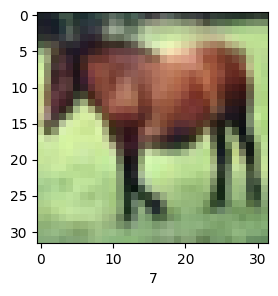

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[7])
plt.xlabel(train_labels[7][0])
plt.show()


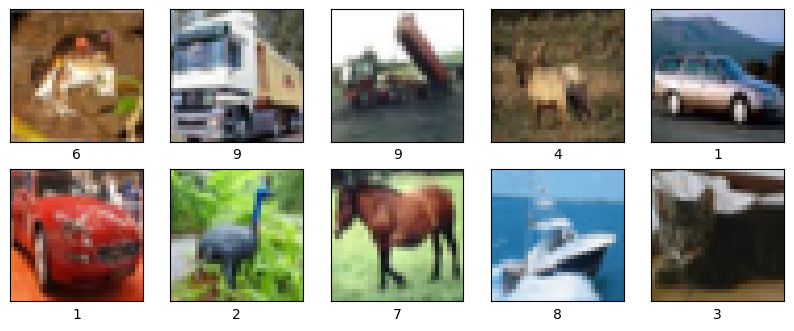

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  #plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i][0])
plt.show()

In [ ]:
#Feature scaling and Data Normalization
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
#building Model
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3629 - loss: 1.7279 - val_accuracy: 0.5464 - val_loss: 1.2610
Epoch 2/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5881 - loss: 1.1569 - val_accuracy: 0.6604 - val_loss: 0.9921
Epoch 3/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6663 - loss: 0.9542 - val_accuracy: 0.6924 - val_loss: 0.8856
Epoch 4/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7084 - loss: 0.8281 - val_accuracy: 0.6620 - val_loss: 0.9808
Epoch 5/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7461 - loss: 0.7296 - val_accuracy: 0.7130 - val_loss: 0.8524
Epoch 6/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7773 - loss: 0.6347 - val_accuracy: 0.7182 - val_loss: 0.8105
Epoch 7/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8026 - loss: 0.5614 - val_accuracy: 0.7192 - val_loss: 0.8273
Epoch 8/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8251 - loss: 0.4989 - val_accura

In [ ]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]


In [ ]:
# 5. Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - 4ms/step - accuracy: 0.6928 - loss: 2.2035

Test accuracy: 0.6928


In [ ]:
img=test_images[7]
label = test_labels[7][0]

Text(0.5, 0, 'frog')

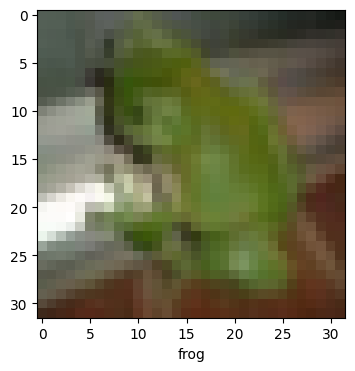

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(test_images[7])
plt.xlabel(class_names[label])

In [ ]:
img=img.reshape(1,32,32,3) # reshaped the testing image into format which is accepted by model

In [ ]:
prediction = model.predict(img) # model return the array of tensor values which represent the probablity values of different classes.
predicted_class = prediction.argmax() # this argmax function return the index of highest value in the prediction array

print("Predicted Label:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
Predicted Label: frog


In [ ]:
confidence = prediction.max() * 100
print("Confidence:", confidence)

Confidence: 90.035034
